#### Assignment #3
#### Name: Mingjie Zeng
#### ID: 671222265
#### Email: mzeng2@wpi.edu

# **Problem 1**



## **a. Implement your own k-means algorithm from the lecture slides using Python. (20 points)**

In [ ]:
# import
import math
import random
import copy

In [ ]:
# calculate the distance between two points
def getDistance(point_1, point_2):
  # dimensions
  dimensions = len(point_1)
  #print(point_1)
  #print(point_2)
  # initial distance
  distance = 0.0
  # calculate
  for i in range(dimensions):
    distance += pow(point_1[i] - point_2[i], 2)
  distance = pow(distance, .5)
  return distance 

In [ ]:
# k-means
# k for numbers of clusters
def kmeans(data, k):
  # randomly select k cluster hearts
  hearts_index = random.sample(list(range(len(data))), k)
  hearts = []
  for i in hearts_index:
    hearts.append(data[i])
  #print("hearts are:", hearts)
  
  # initial the labels as 0
  labels = []
  for i in range(len(data)):
    labels.append(-1)
  
  # iterations until the k-hearts don't change
  clusterHeartNew = []
  for i in hearts_index:
    clusterHeartNew.append(data[i]+ [.5, .5])
  
  bothEle = [x for x in hearts if x in clusterHeartNew]
  diffEle = [y for y in (hearts + clusterHeartNew) if y not in bothEle]

  count = 0
  
  while(diffEle or count<20):
    count += 1
    # initial clusters
    C = []
    for i in range(k):
      C.append([])

    # iterate the entire data
    for itemIndex, item in enumerate(data):
      # initial class label
      classIndex = -1
      minDistance = 1e6
      # calculate distance between chosen hearts and other points
      #print("1 hearts:", hearts)
      for elemIndex, elem in enumerate(hearts):
        distance = getDistance(item, elem)
        # determine if the point belongs to this cluster
        if(distance < minDistance):
          classIndex = elemIndex
          minDistance = distance
      C[classIndex].append(item)
      labels[itemIndex] = classIndex
    #print("C:", C)

    # update the hearts of clusters
    hearts = copy.deepcopy(clusterHeartNew)
    #print("2 hearts:", hearts)

    for clusterIndex, cluster in enumerate(C):
      clusterHeartEle = []
      dimension = len(dataset[0])
      for j in range(dimension):
        clusterHeartEle.append(0)
      for item in cluster:
        for coordinateIndex, coordinate in enumerate(item):
          clusterHeartEle[coordinateIndex] += coordinate / len(cluster)
      clusterHeartNew[clusterIndex] = clusterHeartEle

    #print("cluster new:", clusterHeartNew)
    bothEle = [x for x in hearts if x in clusterHeartNew]
    diffEle = [y for y in (hearts + clusterHeartNew) if y not in bothEle]
  print(count)
  return C, labels


## **b. Using the k-means algorithm, cluster the data from the attached file cluster_data.txt.**
**Plot X, Y coordinates for the entire dataset. Use different symbols and colors to represent your data points for different clusters.**
**Label X and Y axis as 'Length' and 'Width', correspondingly. Label each cluster as “Cluster 1”, “Cluster 2”, etc. Explain your findings. (10 points)** 

In [ ]:
# import data
import re

myData = open("/content/drive/MyDrive/Colab Notebooks/data/AI/cluster_data.txt")
data = myData.readlines()

dataString = []

for line in data:
  odom = line.split()        
  for item in odom:
    if('E' in item or 'e' in item):
      data_float = '{:.3f}'.format(float(item))
      dataString.append(data_float)
    else:
      dataString.append(item)
  
#print(dataString)

dataset = [[float(dataString[i]), float(dataString[i+1])] for i in range(1, len(dataString)-1, 3)]

print(dataset)

[[0.0, 0.0], [0.1, -0.1], [0.2, -0.2], [0.3, -0.3], [0.4, -0.4], [0.5, -0.5], [0.6, -0.6], [0.7, -0.7], [0.8, -0.8], [0.9, -0.9], [1.0, -1.0], [0.1, 0.1], [0.2, 0.0], [0.3, -0.1], [0.4, -0.2], [0.5, -0.3], [0.6, -0.4], [0.7, -0.5], [0.8, -0.6], [0.9, -0.7], [1.0, -0.8], [1.1, -0.9], [0.2, 0.2], [0.3, 0.1], [0.4, 0.0], [0.5, -0.1], [0.6, -0.2], [0.7, -0.3], [0.8, -0.4], [0.9, -0.5], [1.0, -0.6], [1.1, -0.7], [1.2, -0.8], [0.3, 0.3], [0.4, 0.2], [0.5, 0.1], [0.6, 0.0], [0.7, -0.1], [0.8, -0.2], [0.9, -0.3], [1.0, -0.4], [1.1, -0.5], [1.2, -0.6], [1.3, -0.7], [0.4, 0.4], [0.5, 0.3], [0.6, 0.2], [0.7, 0.1], [0.8, 0.0], [0.9, -0.1], [1.0, -0.2], [1.1, -0.3], [1.2, -0.4], [1.3, -0.5], [1.4, -0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1], [1.0, 0.0], [1.1, -0.1], [1.2, -0.2], [1.3, -0.3], [1.4, -0.4], [1.5, -0.5], [0.6, 0.6], [0.7, 0.5], [0.8, 0.4], [0.9, 0.3], [1.0, 0.2], [1.1, 0.1], [1.2, 0.0], [1.3, -0.1], [1.4, -0.2], [1.5, -0.3], [1.6, -0.4], [0.7, 0.7], [0.8, 0.6], [0

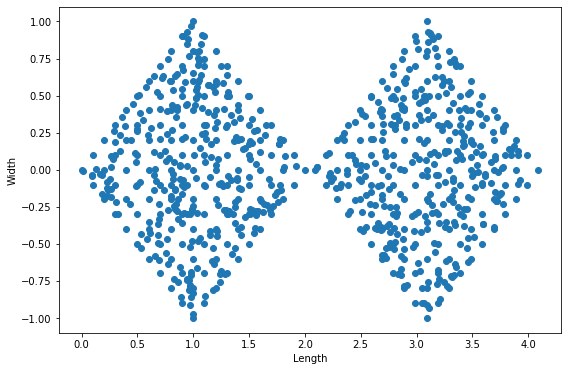

In [ ]:
# print points to choose a k
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np

data_arr = np.array(dataset)

plt.figure(figsize=(9,6))
plt.xlabel('Length')
plt.ylabel('Width')

plt.scatter(data_arr[:,0],data_arr[:,1])
plt.show()

As can be seen from the general image of the data, this data set allows for an explicit selection of a k value of 2. We can identify the left part and the right part as a cluster each.

20


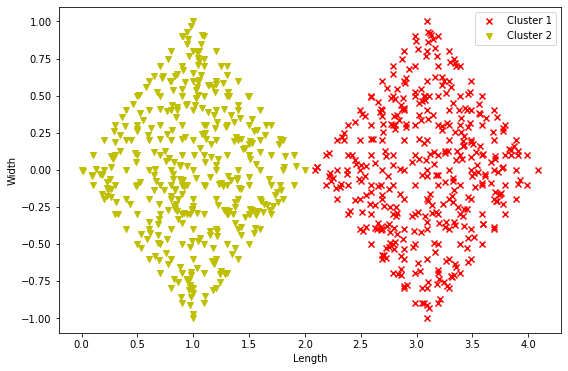

In [ ]:
# set k for 2
C, labels = kmeans(dataset, 2)

colValue = ['r', 'y']
markerValue = ['x', 'v']
labelValue = ['Cluster 1', 'Cluster 2']

plt.figure(figsize=(9,6))
plt.xlabel('Length')
plt.ylabel('Width')

for i in range(len(C)):
    coo_X = []    
    coo_Y = []    
    for j in range(len(C[i])):
        coo_X.append(C[i][j][0])
        coo_Y.append(C[i][j][1])
    plt.scatter(coo_X, coo_Y, marker=markerValue[i%len(markerValue)], color=colValue[i%len(colValue)], label=labelValue[i%len(labelValue)])
 
plt.legend(loc='upper right')
plt.show()


# **Problem 2**


## **a. Implement your own logistic regression with regularization algorithm from the lecture slides using Python. (20 points)**



In [465]:
class LogisticRegression:
    
    def __init__(self,penalty = None,Lambda = 1,a = 0.001,epochs = 10001):
        self.W = None
        # regularization
        self.penalty = penalty
        self.Lambda = Lambda
        self.a = a
        self.epochs =epochs
        self.sigmoid = lambda x:1/(1 + np.exp(-x))
        
    def loss(self,x,y):
        m=x.shape[0]
        y_pred = self.sigmoid(x * self.W)
        return (-1/m) * np.sum((np.multiply(y, np.log(y_pred)) + np.multiply((1-y),np.log(1-y_pred))))
    
    def fit(self,x,y):
        lossList = []
        # number of samples
        m = x.shape[0]
        X = np.concatenate((np.ones((m,1)),x),axis = 1)
        # number of features
        n = X.shape[1]
        # initial w
        self.W = np.mat(np.ones((n,1)))
        # matrix
        xMat = np.mat(X)
        # matrix
        yMat = np.mat(y.reshape(-1,1))
        # iteration
        for i in range(self.epochs):

            h = self.sigmoid(xMat * self.W)
            gradient = xMat.T * (h - yMat)/m
            
            # regularization: l1/l2 with lambda
            if self.penalty == 'l2':
                gradient = gradient + self.Lambda * self.W
            elif self.penalty == 'l1':
                gradient = gradient + self.Lambda * np.sign(self.W)
          
            self.W = self.W-self.a * gradient
            if i % 50 == 0:
                lossList.append(self.loss(xMat,yMat))
		
        return self.W,lossList





## **b. Using the implemented algorithm, train and test the data from the attached file ckd_data.zip. (10 points)** 

**• Use 80% of each class data to train your classifier and the remaining 20% to test it.**

**• Run different values of logistic regression regularization parameter (λ). The range of λ is from -2 to 4 and the step is 0.2**

**• Plot the f-measure of the algorithm’s performance on the training and test sets as a function of λ:**

$$f - measure= \frac{2 \times Pre\times Rec}{ Pre + Rec}$$
**where** 
$$Pre=\frac{ TP}{TP + FP}$$; 
$$Rec= \frac{TP}{TP + FN}$$ ; 
**and TP is the number of true positives (class 1 members predicted as class 1),** 
   
**TN is the number of true negatives (class 2 members predicted as class 2),**

**FP is the number of false positives (class 2 members predicted as class 1),**

**and FN is the number of false negatives (class 1 members predicted as class 2).**

### Data import and data reconstructure

In [466]:
# import data
import pandas as pd
# show all columns
pd.set_option('display.max_columns', None)

data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/AI/kidney_disease.csv')

print(data_df.head())
print(data_df.shape)

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   dm cad appet   pe  \
0  121.0  36.0  1.2    NaN  NaN  15.4  44  7800  5.2  yes  yes  no  good   no   
1    NaN  18.0  0.8    NaN  NaN  11.3  38  6000  NaN   no   no  no  good   no   
2  423.0  53.0  1.8    NaN  NaN   9.6  31  7500  NaN   no  yes  no  poor   no   
3  117.0  56.0  3.8  111.0  2.5  11.2  32  6700  3.9  yes   no  no  poor  yes   
4  106.0  26.0  1.4    NaN  NaN  11.6  35  7300  4.6   no   no  no  good   no   

   ane classification  
0   no  

In [467]:
# drop id
data_df.drop(['id'], axis=1, inplace=True)
# rename to understand
data_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

print(data_df.head())
print(data_df.info())

    age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  blood_urea  \
0    normal      notpresent  notpresent                 121.0        36.0   
1    normal      notpresent  notpresent                   NaN        18.0   
2    normal      notpresent  notpresent                 423.0        53.0   
3  abnormal         present  notpresent                 117.0        56.0   
4    normal      notpresent  notpresent                 106.0        26.0   

   serum_creatinine  sodium  potassium  haemoglobin packed_cell_volume  \


In [468]:
# converting necessary columns to numerical type

data_df['packed_cell_volume'] = pd.to_numeric(data_df['packed_cell_volume'], errors='coerce')
data_df['white_blood_cell_count'] = pd.to_numeric(data_df['white_blood_cell_count'], errors='coerce')
data_df['red_blood_cell_count'] = pd.to_numeric(data_df['red_blood_cell_count'], errors='coerce')

print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [469]:
# label columns and number columns
label_cols = [col for col in data_df.columns if data_df[col].dtype == 'object']
number_cols = [col for col in data_df.columns if data_df[col].dtype != 'object']

print('label columns:', label_cols)
print('number columns:', number_cols)

label columns: ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']
number columns: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [470]:
# find unique values in label columns
for col in label_cols:
  print(f"{col} : {data_df[col].unique()} \n")

red_blood_cells : [nan 'normal' 'abnormal'] 

pus_cell : ['normal' 'abnormal' nan] 

pus_cell_clumps : ['notpresent' 'present' nan] 

bacteria : ['notpresent' 'present' nan] 

hypertension : ['yes' 'no' nan] 

diabetes_mellitus : ['yes' 'no' ' yes' '\tno' '\tyes' nan] 

coronary_artery_disease : ['no' 'yes' '\tno' nan] 

appetite : ['good' 'poor' nan] 

peda_edema : ['no' 'yes' nan] 

aanemia : ['no' 'yes' nan] 

class : ['ckd' 'ckd\t' 'notckd'] 



In [471]:
# replace incorrect values
data_df['diabetes_mellitus'] = data_df['diabetes_mellitus'].replace(to_replace = {' yes':'yes','\tno':'no','\tyes':'yes'})
data_df['coronary_artery_disease'] = data_df['coronary_artery_disease'].replace(to_replace = {'\tno':'no'})
data_df['class'] = data_df['class'].replace(to_replace = {'ckd\t':'ckd'})

In [472]:
# change 'class' to 0(ckd) and 1(notckd)
#data_df['class'] = data_df['class'].map({'ckd':0, 'notckd':1})
#data_df['class'] = pd.to_numeric(data_df['class'], errors='coerce')

In [473]:
# check unique values after adjustment
check_cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in check_cols:
  print(f"{col} : {data_df[col].unique()} \n")

diabetes_mellitus : ['yes' 'no' nan] 

coronary_artery_disease : ['no' 'yes' nan] 

class : ['ckd' 'notckd'] 



### data pre-process

In [474]:
# check null values
data_df.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [475]:
# refill null values 
# random sampling
def random_sampling(feature):
  random_sample = data_df[feature].dropna().sample(data_df[feature].isna().sum())
  random_sample.index = data_df[data_df[feature].isnull()].index
  data_df.loc[data_df[feature].isnull(), feature] = random_sample

# frequency sampling
def frequency_sampling(feature):
  frequency = data_df[feature].mode()[0]
  data_df[feature] = data_df[feature].fillna(frequency)

In [476]:
# fill null for number_cols
for col in number_cols:
  random_sampling(col)

# check
data_df[number_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [477]:
# fill null for label_cols
random_sampling('red_blood_cells')
random_sampling('pus_cell')

for col in label_cols:
  frequency_sampling(col)

# check
data_df[label_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

### feature encoding

In [478]:
# check labels
for col in label_cols:
  print(f"{col} : {data_df[col].nunique()} labels\n")

red_blood_cells : 2 labels

pus_cell : 2 labels

pus_cell_clumps : 2 labels

bacteria : 2 labels

hypertension : 2 labels

diabetes_mellitus : 2 labels

coronary_artery_disease : 2 labels

appetite : 2 labels

peda_edema : 2 labels

aanemia : 2 labels

class : 2 labels



In [479]:
# label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in label_cols:
  data_df[col] = le.fit_transform(data_df[col])

print(data_df.head())

    age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  blood_urea  \
0         1                0         0                 121.0        36.0   
1         1                0         0                 112.0        18.0   
2         1                0         0                 423.0        53.0   
3         0                1         0                 117.0        56.0   
4         1                0         0                 106.0        26.0   

   serum_creatinine  sodium  potassium  haemoglobin  packed_cell_volume  \

### training/testing dataset

In [481]:
# training/testing dataset
from sklearn.model_selection import train_test_split

# use for prediction
feature_col = [col for col in data_df.columns if col != 'class']
# target feature
target_col = 'class'

X = data_df[feature_col]
Y = data_df[target_col]
print('X:', X.shape)
print('Y:', Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state = 0
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)
#print(X_test.columns)
print(Y_train)

X: (400, 24)
Y: (400,)
X_train: (320, 24)
X_test: (80, 24)
Y_train: (320,)
Y_test: (80,)
336    1
64     0
55     0
106    0
300    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: class, Length: 320, dtype: int64


### train and test

In [485]:
# train the model with different lbd
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
lbd = [-2.0, -1.8, -1.6, -1.4, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 
       1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]

fscore_l1 = []
fscore_l2 = []

m = X_test.values.shape[0]
X = np.concatenate((np.ones((m,1)), X_test.values), axis=1)
xMat = np.mat(X)

#for i in range(0,31):
#  x = 2 * i
#  item = x/10 - 2
#  lbd.append(item)

#print(len(lbd))
print(lbd_v)

for i in range(len(lbd)):
  lr1 = LogisticRegression(Lambda=lbd[i],penalty='l1')
  w1,lossList1 = lr1.fit(X_train.values,Y_train.values)

  lr2 = LogisticRegression(Lambda=lbd[i],penalty='l2')
  w2,lossList2 = lr2.fit(X_train.values,Y_train.values)

  pred1 = [1 if x >= 0.5 else 0 for x in lr.sigmoid(xMat*w1)]
  pred2 = [1 if x >= 0.5 else 0 for x in lr.sigmoid(xMat*w2)]

  fscore_l1.append(metrics.f1_score(Y_test, pred1))
  fscore_l2.append(metrics.f1_score(Y_test, pred2))


print(fscore_l1)
print(fscore_l2)

#print(pred)
#print('X_test:', X_test.shape)
#print('pred:', pred.shape)

[-2.0, -1.8, -1.6, -1.4, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]
[0.0, 0.7666666666666666, 0.0, 0.6829268292682926, 0.5544554455445544, 0.125, 0.7000000000000001, 0.0, 0.5544554455445544, 0.6792452830188679, 0.0, 0.13333333333333333, 0.0, 0.12903225806451613, 0.5436893203883496, 0.125, 0.0, 0.5714285714285715, 0.5436893203883496, 0.0, 0.7164179104477612, 0.5544554455445544, 0.6440677966101694, 0.7187499999999999, 0.5283018867924528, 0.0, 0.5283018867924528, 0.6923076923076923, 0.5283018867924528, 0.0, 0.0]
[0.7540983606557378, 0.7419354838709677, 0.7419354838709677, 0.7419354838709677, 0.7241379310344827, 0.736842105263158, 0.736842105263158, 0.736842105263158, 0.736842105263158, 0.125, 0.0, 0.0, 0.5185185185185185, 0.0, 0.0, 0.5185185185185185, 0.0, 0.5185185185185185, 0.0, 0.0, 0.0, 0.0, 0.5185185185185185, 0.5185185185185185, 0.0, 0.0, 0.5185185185185185, 0.0, 0.0, 0.0, 0.51851851851

### plot

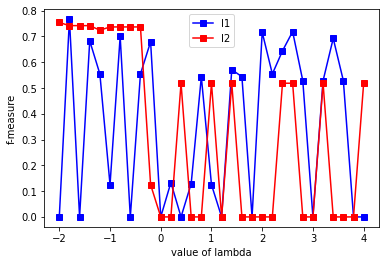

In [486]:
# Plot the f-measure of the algorithm’s performance
import matplotlib.pyplot as plt 
x = lbd_v
y1 = fscore_l1
y2 = fscore_l2

plt.plot(x,y1,'s-',color = 'b',label="l1")
plt.plot(x,y2,'s-',color = 'r',label="l2")

plt.xlabel("value of lambda")
plt.ylabel("f-measure")
plt.legend(loc = "best")
plt.show()

**c. Repeat the procedure in (b) but now using the features normalized with the standardization protocol discussed in the class. (10 points)**

### standardization

In [487]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = number_cols

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

#print(type(X_test_stand))

<class 'pandas.core.frame.DataFrame'>


### train and test

In [489]:
# train the model with different lbd
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
lbd = [-2.0, -1.8, -1.6, -1.4, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 
       1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]

fscore_l1 = []
fscore_l2 = []

m = X_test_stand.values.shape[0]
X = np.concatenate((np.ones((m,1)), X_test_stand.values), axis=1)
xMat = np.mat(X)

#for i in range(0,31):
#  x = 2 * i
#  item = x/10 - 2
#  lbd.append(item)

#print(len(lbd))
print(lbd_v)

for i in range(len(lbd)):
  lr1 = LogisticRegression(Lambda=lbd[i],penalty='l1')
  w1,lossList1 = lr1.fit(X_train_stand.values,Y_train.values)

  lr2 = LogisticRegression(Lambda=lbd[i],penalty='l2')
  w2,lossList2 = lr2.fit(X_train_stand.values,Y_train.values)

  pred1 = [1 if x >= 0.5 else 0 for x in lr.sigmoid(xMat*w1)]
  pred2 = [1 if x >= 0.5 else 0 for x in lr.sigmoid(xMat*w2)]

  fscore_l1.append(metrics.f1_score(Y_test, pred1))
  fscore_l2.append(metrics.f1_score(Y_test, pred2))


print(fscore_l1)
print(fscore_l2)

#print(pred)
#print('X_test:', X_test.shape)
#print('pred:', pred.shape)

[-2.0, -1.8, -1.6, -1.4, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]
[0.5894736842105264, 0.5957446808510638, 0.5957446808510638, 0.5957446808510638, 0.6021505376344086, 0.6021505376344086, 0.6021505376344086, 0.6363636363636364, 0.6588235294117647, 0.7297297297297297, 0.9473684210526316, 0.9491525423728813, 0.9032258064516129, 0.912280701754386, 0.05128205128205127, 0.6666666666666665, 0.5294117647058824, 0.11940298507462686, 0.5818181818181818, 0.5675675675675675, 0.7142857142857143, 0.6037735849056605, 0.7105263157894737, 0.8059701492537313, 0.0821917808219178, 0.10526315789473685, 0.6753246753246754, 0.6835443037974683, 0.53125, 0.5365853658536585, 0.577319587628866]
[0.5957446808510638, 0.5957446808510638, 0.5957446808510638, 0.6021505376344086, 0.6021505376344086, 0.6021505376344086, 0.6292134831460674, 0.6511627906976745, 0.6923076923076923, 0.782608695652174, 0.9473684210526316, 0.9

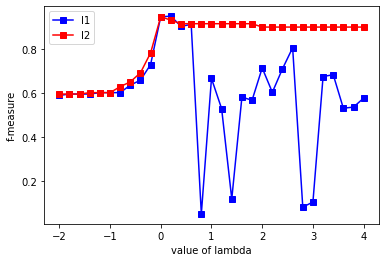

In [490]:
# Plot the f-measure of the algorithm’s performance
import matplotlib.pyplot as plt 
x = lbd_v
y1 = fscore_l1
y2 = fscore_l2

plt.plot(x,y1,'s-',color = 'b',label="l1")
plt.plot(x,y2,'s-',color = 'r',label="l2")

plt.xlabel("value of lambda")
plt.ylabel("f-measure")
plt.legend(loc = "best")
plt.show()



---

# **In the following part of the assignment, you will be working on applying methods and datasets from the scikit-learn library.**

# **Problem 3**

**Apply three clustering techniques to the handwritten digits dataset. Assume that k = 10. (30 points)**

**a. K-means clustering (implemented in Problem 1).**

**b. Agglomerative clustering with Ward linkage (sklearn.cluster.AgglomerativeClustering).**

**c. Affinity Propagation (sklearn.cluster.AffinityPropagation).**
**The dataset you will be working with is the handwritten digits and the details can be found here.**

**Assess all three clustering algorithms using the following protocol:**

**i. Each cluster should be defined by the digit that represents the majority of the current cluster. For examples, if in the second cluster, there are 60 data points of digit “5”, 40 of “3” and 25 of “2”, the cluster is labeled as “5”.**

**ii. Report the 10x10 confusion matrix by comparing the predicted clusters with the actual labels of the datasets. If the clustering procedure resulted in less than 10 clusters, output “-1” in the position to the missing clusters in the confusion matrix.**

**iii. Calculate the accuracy of each clustering method using the Fowlkes-Mallows index (sklearn.metrics.fowlkes_mallows_score).**

## data

In [ ]:
# load data
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
# check digits
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [ ]:
# check data type
print(type(digits.images))
print(type(digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# check shape
print(digits.images.shape)
print(digits.target.shape)

(1797, 8, 8)
(1797,)


In [ ]:
# check image data
print(digits.images[0]) 

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


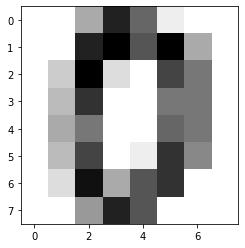

In [ ]:
# display this image
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap='binary')
plt.show()

In [ ]:
# check target
print(digits.target)

[0 1 2 ... 8 9 8]


In [ ]:
# training data
from sklearn.preprocessing import scale
data = scale(digits.data)
y = digits.target

samples, features = data.shape

k=10

print(type(data))
print(data)

<class 'numpy.ndarray'>
[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


## a. K-means clustering (implemented in Problem 1).

In [ ]:
from sklearn.cluster import KMeans
clf_kmeans = KMeans(n_clusters=k, init="random")
pred_kmeans = clf_kmeans.fit(data)

[[  0   0   0   0   0 177   0   0   1   0]
 [  0  58   0  97   0   0   0  27   0   0]
 [  7   6   0  35   2   0  80  47   0   0]
 [153   0   0   6  10   0  13   1   0   0]
 [  0   7   8   1   9   0   0   0 156   0]
 [ 77   2   0  16  36   0  46   0   2   3]
 [  0   1   0   5   0   1   0   0   0 174]
 [  0   2  18   1 150   0   8   0   0   0]
 [ 47  14   0  93   6   0  11   0   0   3]
 [145  19   3   1  11   0   1   0   0   0]]


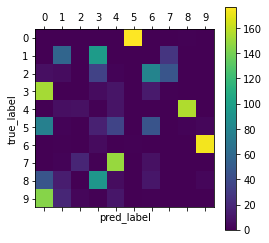

In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred_kmeans.labels_))

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np

y_true = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_pred = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

maxtrix = confusion_matrix(y, pred_kmeans.labels_)
plt.matshow(maxtrix)
plt.colorbar()
plt.xlabel('pred_label')
plt.ylabel('true_label')
plt.xticks(np.arange(maxtrix.shape[1]),labels)
plt.yticks(np.arange(maxtrix.shape[1]),labels)
plt.show()


In [ ]:
# Calculate the accuracy of each clustering method
print('The accuracy of K-Means is:', metrics.fowlkes_mallows_score(y, pred_kmeans.labels_))

The accuracy of K-Means is: 0.5291532811819435


## b. Agglomerative clustering with Ward linkage

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clf_a = AgglomerativeClustering(n_clusters=k)
pred_a = clf_a.fit(data)

[[ 1  0  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  6  0  0  0  6  0  0]
 [ 0  6  2  0  0  0  1  0  0  0]
 [ 0  0  0  0  1 13  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  5]
 [21  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0]]


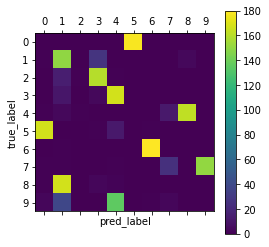

In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred_ap.labels_,labels=labels))

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np

y_true = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_pred = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
maxtrix = confusion_matrix(y, pred_a.labels_,labels=labels)
plt.matshow(maxtrix)
plt.colorbar()
plt.xlabel('pred_label')
plt.ylabel('true_label')
plt.xticks(np.arange(maxtrix.shape[1]),labels)
plt.yticks(np.arange(maxtrix.shape[1]),labels)
plt.show()

In [ ]:
# Calculate the accuracy of each clustering method
print('The accuracy of Agglomerative clustering is:', metrics.fowlkes_mallows_score(y, pred_a.labels_))

The accuracy of Agglomerative clustering is: 0.7110777674392866


## c. Affinity Propagation




In [ ]:
from sklearn.cluster import AffinityPropagation
clf_ap = AffinityPropagation()
pred_ap = clf_ap.fit(data)

[[ 1  0  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  6  0  0  0  6  0  0]
 [ 0  6  2  0  0  0  1  0  0  0]
 [ 0  0  0  0  1 13  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  5]
 [21  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0]]


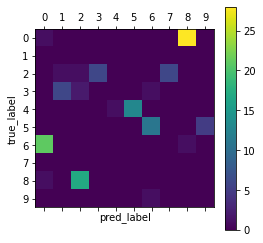

In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred_ap.labels_,labels=labels))

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np

y_true = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_pred = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
maxtrix = confusion_matrix(y, pred_ap.labels_,labels=labels)
plt.matshow(maxtrix)
plt.colorbar()
plt.xlabel('pred_label')
plt.ylabel('true_label')
plt.xticks(np.arange(maxtrix.shape[1]),labels)
plt.yticks(np.arange(maxtrix.shape[1]),labels)
plt.show()


In [ ]:
# Calculate the accuracy of each clustering method
print('The accuracy of Affinity Propagation is:', metrics.fowlkes_mallows_score(y, pred_ap.labels_))

The accuracy of Affinity Propagation is: 0.2937138624975988


# **Problem 4**

**Apply three classification algorithms to the same ckd_data.zip dataset as in Problem 2. (30 points)**

**a. Support Vector Machine with the linear kernel and default parameters (sklearn.svm.SVC).**

**b. Support Vector Machine with the RBF kernel and default parameters.**

**c. Random forest with default parameters (sklearn.ensemble.RandomForestClassifier).**

**Assess all three classification algorithms using the following protocol:**

**i. Use 80% of each class data to train your classifier and the remaining 20% to test it.**

**ii. Report the f-measure of the algorithm’s performance on the training and test sets.**
$$f - measure= \frac{2\times Pre\times Rec}{ Pre + Rec}$$
**where** $$Pre=\frac{ TP}{TP + FP}$$ ; $$Rec= \frac{TP}{TP + FN}$$ ;  

### data part is the same from Problem 2



## a. Support Vector Machine with the linear kernel and default parameters (sklearn.svm.SVC).

In [ ]:
from sklearn import svm
clf_SVM_l = svm.SVC(kernel='linear') 
clf_SVM_l.fit(X_train,Y_train) 

pred_SVM_l = clf_SVM_l.predict(X_test)

In [ ]:
from sklearn import metrics
print('f-measure of SVM with the linear kernel:', metrics.f1_score(Y_test, pred_SVM_l))

f-measure of SVM with the linear kernel: 0.9310344827586207


## b. Support Vector Machine with the RBF kernel and default parameters.

In [ ]:
from sklearn import svm
clf_SVM_rbf = svm.SVC(kernel='rbf') 
clf_SVM_rbf.fit(X_train,Y_train) 

pred_SVM_rbf = clf_SVM_rbf.predict(X_test)

In [ ]:
from sklearn import metrics
print('f-measure of SVM with the RBF kernel:', metrics.f1_score(Y_test, pred_SVM_rbf))

f-measure of SVM with the RBF kernel: 0.0


## c. Random forest with default parameters (sklearn.ensemble.RandomForestClassifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier()
clf_RF.fit(X_train,Y_train) 

pred_RF = clf_RF.predict(X_test)

In [ ]:
from sklearn import metrics
print('f-measure of Random forest:', metrics.f1_score(Y_test, pred_RF))

f-measure of Random forest: 0.9433962264150945


## comparison of performance

In [ ]:
# Draw table
from prettytable import PrettyTable
performance_table = PrettyTable()
performance_table.field_names = ['classification algorithms', 'f-measure']
performance_table.add_row(['SVM with the linear kernel', 
                            metrics.f1_score(Y_test, pred_SVM_l)])
performance_table.add_row(['SVM with the RBF kernel', 
                            metrics.f1_score(Y_test, pred_SVM_rbf)])
performance_table.add_row(['Random forest', 
                            metrics.f1_score(Y_test, pred_RF)])

print(performance_table)

+----------------------------+--------------------+
| classification algorithms  |     f-measure      |
+----------------------------+--------------------+
| SVM with the linear kernel | 0.9310344827586207 |
|  SVM with the RBF kernel   |        0.0         |
|       Random forest        | 0.9433962264150945 |
+----------------------------+--------------------+
